# Chapter 7 exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0

def discretise(a,b,h_appr):
    n=int(np.ceil((b-a)/h_appr) +1) #steps required
    t=np.linspace(a,b,n)            #discretised domain
    h=t[1]-t[0]                     #computed step size
    return t,h

from scipy import sparse
import scipy.sparse.linalg

**Question 1**<br>
The second derivative problem for the logistic function that we saw in {eq}`ord2logist` cannot easily be implemented as a boundary value problems because the problem is stiff in the limit $t\to\infty$.

**Question 2**<br>
The central difference formula gives

\begin{equation*}
u_{k+1}-2u_k+u_{k-1}=h^2\sin(2\pi x_k)
\end{equation*}

With the boundary conditions included, we obtain the system below, where $f(x)=\sin(2\pi x)$.

\begin{equation*}
\left[\begin{matrix}
1 & 0  & 0 &  & \dots& 0 & 0\\
1 & -2 & 1 & & & & 0\\
  & 1 & -2 & 1&&&\vdots\\
\vdots && \ddots&\ddots &\ddots\\
&&&1&-2&1&\\
0& &&&1&-2&1\\
0&0&\dots&&0&0&1
\end{matrix}\right]
\left[\begin{matrix}u_1\\u_2\\u_3\\\vdots\\u_{n-2}\\u_{n-1}\\u_n\end{matrix}\right]
=h^2\left[\begin{matrix}0\\f(x_2)\\f(x_3)\\\vdots\\f(x_{n-2})\\f(x_{n-1})\\0\end{matrix}\right]
\end{equation*}

The following code can be used to produce the solution:

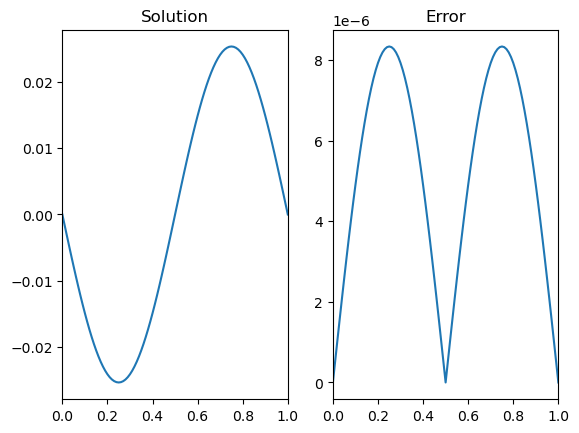

In [2]:
# Define the nodes
x,h=discretise(0,1,0.01); n=len(x)

# Create a lambda function for f
f= lambda x: np.sin(2*np.pi*x);

# Construct coefficient matrices :
A = sparse.lil_matrix((n, n))
c1,c2,c3= [1, -2, 1]
A.setdiag([c1]*(n-1),k=-1)
A.setdiag([c2]*(n),  k=0 )
A.setdiag([c3]*(n-1),k=1 )
b=h**2*f(x)
A[0, [ 0, 1, 2]]=[1,0,0]; b[0 ] = 0  # x(0)
A[-1,[-3,-2,-1]]=[0,0,1]; b[-1] = 0  # x(1)
A = A.tocsr();
u=sparse.linalg.spsolve(A,b)

# Plot and compare to the analytic solution
sol = -np.sin(2*np.pi*x)/4/np.pi**2;

fig,ax = plt.subplots(1,2)
ax[0].plot(x,u)
ax[0].set_title('Solution')
ax[1].plot(x,abs(u-sol))
ax[1].set_title('Error')
plt.show()

**Question 3**<br>
The equation can be written out using the central differences formula as:

\begin{equation*}
\frac{\phi_{i-1}-2\phi_i+\phi_{i+1}}{h^2}+\frac{1}{r_i}\frac{\phi_{i+1}-\phi_{i-1}}{2h}=0
\end{equation*}

which rearranges to

\begin{equation*}
\left(r_i-\frac{h}{2}\right)\phi_{i-1}-2r_i \phi_i+\left(r_i+\frac{h}{2}\right)\phi_{i+1}=0
\end{equation*}

This can be applied as follows

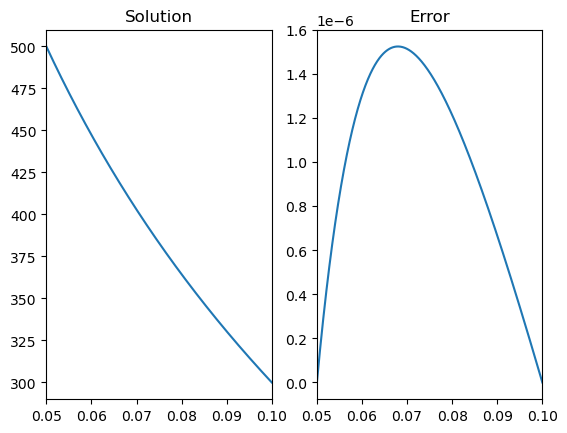

In [3]:
r=np.linspace(0.05,0.10,1000)
h=r[1]-r[0]
n=len(r)

A=sparse.lil_matrix((n, n))
A.setdiag(r[1:]-h/2,k=-1)
A.setdiag(r[0:-1]+h/2,k=1 )
A.setdiag(-2*r,k=0)
A[0,[0,1,2]]=[1,0,0]
A[-1,[-3,-2,-1]]=[0,0,1]
A = A.tocsr()

b=np.zeros((n,1))
b[0]=500;b[-1]=300

f=sparse.linalg.spsolve(A,b)
fsol=300+200*(np.log(0.10)-np.log(r))/np.log(2)


fig,ax = plt.subplots(1,2)
ax[0].plot(r,f)
ax[0].set_title('Solution')
ax[1].plot(r,abs(f-fsol))
ax[1].set_title('Error')
plt.show()